# Capstone Three: Preprocessing + Modeling
## Post-Hurricane Building Damage Image Classification

### Load in packages and dataset

In [18]:
# import packages

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from skimage import io
import pandas as pd

In [2]:
# Prepare to load training set images

train_data = []
train_labels = []

train_folder_damage = 'storage/train_another/damage'
class_id_damage = 1

train_folder_no_damage = 'storage/train_another/no_damage'
class_id_no_damage = 0

In [3]:
# Loop through folders to load images, extract filename, labels, lat/long, etc

# damage images
for file in os.listdir(train_folder_damage):
    image_path = os.path.join(train_folder_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    train_data.append(image)
    train_labels.append(class_id_damage)
    

# no_damage images
for file in os.listdir(train_folder_no_damage):
    image_path = os.path.join(train_folder_no_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    train_data.append(image)
    train_labels.append(class_id_no_damage)
    

In [4]:
# Repeat for test set
# Prepare to load test set images

test_data = []
test_labels = []

test_folder_damage = 'storage/test_another/damage'
class_id_damage = 1

test_folder_no_damage = 'storage/test_another/no_damage'
class_id_no_damage = 0

In [5]:
# Loop through folders to load test images

# damage images
for file in os.listdir(test_folder_damage):
    image_path = os.path.join(test_folder_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    test_data.append(image)
    test_labels.append(class_id_damage)

# no_damage images
for file in os.listdir(test_folder_no_damage):
    image_path = os.path.join(test_folder_no_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    test_data.append(image)
    test_labels.append(class_id_no_damage)

In [6]:
# Repeat for validation set
# Prepare to load val set images

val_data = []
val_labels = []

val_folder_damage = 'storage/validation_another/damage'
class_id_damage = 1

val_folder_no_damage = 'storage/validation_another/no_damage'
class_id_no_damage = 0

In [7]:
# Loop through folders to load val images

# damage images
for file in os.listdir(val_folder_damage):
    image_path = os.path.join(val_folder_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    val_data.append(image)
    val_labels.append(class_id_damage)

# no_damage images
for file in os.listdir(val_folder_no_damage):
    image_path = os.path.join(val_folder_no_damage, file)
    base = os.path.basename(image_path)
    filename = os.path.splitext(base)
    image = io.imread(image_path)
    image=np.array(image)
    image=image.astype('float32')
    size = os.path.getsize(image_path)
    val_data.append(image)
    val_labels.append(class_id_no_damage)

Reshape and normalize datasets to get images in the correct shape for CNN with keras.

In [8]:
# get train set in correct shape
X_train = np.array(train_data, np.float32)
y_train = np.array(train_labels, np.float32)
y_train = y_train.reshape(y_train.shape[0], 1)

# get test set in correct shape
X_test = np.array(test_data, np.float32)
y_test = np.array(test_labels, np.float32)
y_test = y_test.reshape(y_test.shape[0], 1)

# get val set in correct shape
X_val = np.array(val_data, np.float32)
y_val = np.array(val_labels, np.float32)
y_val = y_val.reshape(y_val.shape[0], 1)

In [9]:
# check data shapes

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')

X_train shape:  (10000, 128, 128, 3)
y_train shape:  (10000, 1)
10000 train samples
9000 test samples
2000 validation samples


In [11]:
# convert to float and normalize data
X_train /= 255
X_test /= 255
X_val /= 225

# encode classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

### CNN Modeling with Keras

Set up initial simple model using one convolutional layer with 4 filters and 5 epochs.

In [10]:
# set global parameters
batch_size = 32
num_classes = 2
epochs = 5
data_augmentation = False

In [12]:
# set up layers for model 1 with one conv layer, 4 filters, 5 epochs
# simple version

model_1 = Sequential()
model_1.add(Conv2D(4, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

#model = Sequential()
#model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (3,3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

#model.add(Dense(num_classes))
#model.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 4)         0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1048640   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation (Activation)      (None, 2)                 0

In [13]:
# RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
# set history and train
history = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
313/313 [==============================] - 15s 49ms/step - loss: 0.6798 - accuracy: 0.5731 - val_loss: 0.6457 - val_accuracy: 0.5840
Epoch 2/5
313/313 [==============================] - 15s 49ms/step - loss: 0.6260 - accuracy: 0.6429 - val_loss: 0.5881 - val_accuracy: 0.6945
Epoch 3/5
313/313 [==============================] - 15s 48ms/step - loss: 0.6033 - accuracy: 0.6642 - val_loss: 0.6059 - val_accuracy: 0.6445
Epoch 4/5
313/313 [==============================] - 15s 48ms/step - loss: 0.5686 - accuracy: 0.7072 - val_loss: 0.5553 - val_accuracy: 0.7400
Epoch 5/5
313/313 [==============================] - 15s 48ms/step - loss: 0.5472 - accuracy: 0.7354 - val_loss: 0.5269 - val_accuracy: 0.7575


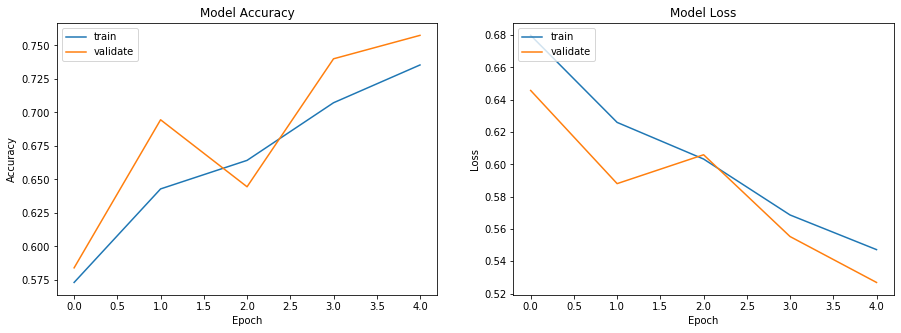

In [15]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()
    
plotmodelhistory(history)

In [20]:
# score model using test set and collect training accuracy for results table

scores_test = model_1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_1.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])


282/282 [==============================] - 5s 17ms/step - loss: 0.4361 - accuracy: 0.8563
Test loss: 0.4361323416233063
Test accuracy: 0.856333315372467
313/313 [==============================] - 5s 17ms/step - loss: 0.5380 - accuracy: 0.7502
Train loss: 0.537973165512085
Train accuracy: 0.7501999735832214


In [21]:
# create results df

results = pd.DataFrame({'model': ['model_1x4_e5'], 'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973


Try to increase accuracy by increasing number of filters to 12.

In [22]:
# set up layers for model 1 with one conv layer, 12 filters, 5 epochs

model_2 = Sequential()
model_2.add(Conv2D(12, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 12)      336       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                

In [23]:
# keep global filters and optimizer the same

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
# set history and train
history = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
313/313 [==============================] - 21s 66ms/step - loss: 0.6473 - accuracy: 0.6270 - val_loss: 0.5757 - val_accuracy: 0.6545
Epoch 2/5
313/313 [==============================] - 21s 66ms/step - loss: 0.5558 - accuracy: 0.7263 - val_loss: 0.5144 - val_accuracy: 0.7695
Epoch 3/5
313/313 [==============================] - 21s 67ms/step - loss: 0.5041 - accuracy: 0.7724 - val_loss: 0.4789 - val_accuracy: 0.7810
Epoch 4/5
313/313 [==============================] - 22s 72ms/step - loss: 0.4626 - accuracy: 0.8060 - val_loss: 0.4968 - val_accuracy: 0.7610
Epoch 5/5
313/313 [==============================] - 24s 78ms/step - loss: 0.4176 - accuracy: 0.8332 - val_loss: 0.3593 - val_accuracy: 0.8755


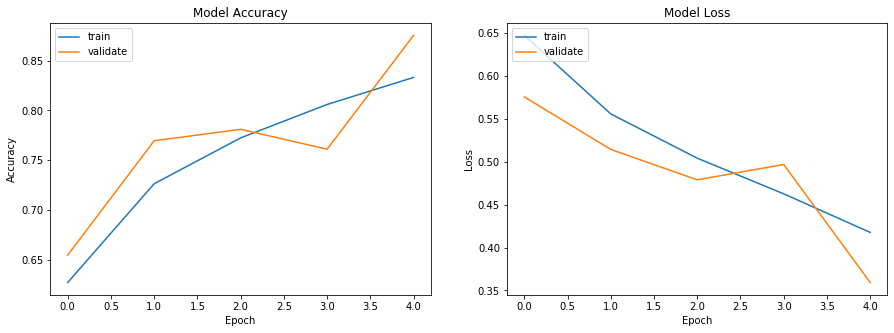

In [25]:
plotmodelhistory(history)

In [26]:
# score model using test set and collect training accuracy for results table

scores_test = model_2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_2.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

282/282 [==============================] - 7s 23ms/step - loss: 0.3504 - accuracy: 0.8883
Test loss: 0.3503691852092743
Test accuracy: 0.8883333206176758
313/313 [==============================] - 7s 23ms/step - loss: 0.3662 - accuracy: 0.8722
Train loss: 0.36622902750968933
Train accuracy: 0.8722000122070312


In [27]:
# add to results df 

results_new = pd.DataFrame({'model': ['model_1x12_e5'],'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results = pd.concat([results, results_new], ignore_index=True)

results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973
1,model_1x12_e5,0.888333,0.350369,0.8722,0.366229


Try to increase accuracy by adding second convolutional layer.

In [28]:
# set up layers for model 3 with 2 conv layer, 12 filters, 5 epochs

model_3 = Sequential()
model_3.add(Conv2D(12, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(12, (3,3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 12)      336       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 12)        1308      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 12)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [29]:
# keep global filters and optimizer the same

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set history and train
history = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
313/313 [==============================] - 25s 80ms/step - loss: 0.6156 - accuracy: 0.6639 - val_loss: 0.5629 - val_accuracy: 0.6205
Epoch 2/5
313/313 [==============================] - 25s 79ms/step - loss: 0.4957 - accuracy: 0.7929 - val_loss: 0.4901 - val_accuracy: 0.8050
Epoch 3/5
313/313 [==============================] - 25s 79ms/step - loss: 0.4349 - accuracy: 0.8352 - val_loss: 0.8148 - val_accuracy: 0.5595
Epoch 4/5
313/313 [==============================] - 24s 78ms/step - loss: 0.4068 - accuracy: 0.8448 - val_loss: 0.3981 - val_accuracy: 0.8525
Epoch 5/5
313/313 [==============================] - 24s 78ms/step - loss: 0.3870 - accuracy: 0.8568 - val_loss: 0.5565 - val_accuracy: 0.7345


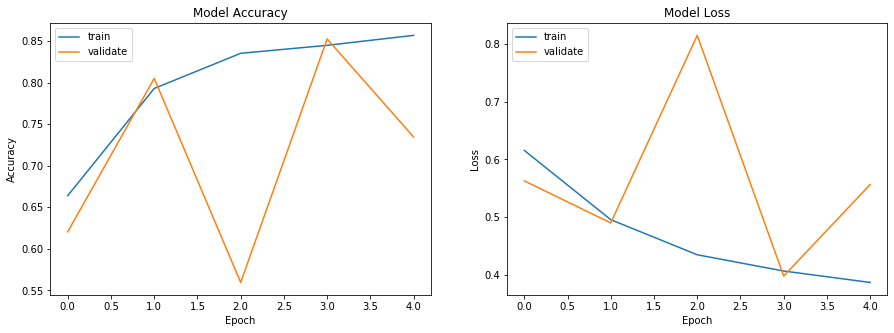

In [30]:
plotmodelhistory(history)

In [31]:
# score model using test set and collect training accuracy for results table

scores_test = model_3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_3.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

282/282 [==============================] - 6s 22ms/step - loss: 0.5507 - accuracy: 0.7907
Test loss: 0.5506644248962402
Test accuracy: 0.7906666398048401
313/313 [==============================] - 7s 22ms/step - loss: 0.3966 - accuracy: 0.8479
Train loss: 0.3966084420681
Train accuracy: 0.8478999733924866


In [32]:
# add to results df 

results_new = pd.DataFrame({'model': ['model_2x12_e5'],'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results = pd.concat([results, results_new], ignore_index=True)

results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973
1,model_1x12_e5,0.888333,0.350369,0.8722,0.366229
2,model_2x12_e5,0.790667,0.550664,0.8479,0.396608


Evaluate impact on accuracy by increasing number of epochs.

In [34]:
# reset epochs
epochs=25

In [35]:
# set up layers for model 4 with 1 conv layer, 12 filters, 25 epochs

model_4 = Sequential()
model_4.add(Conv2D(12, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 12)      336       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 12)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                

In [36]:
# keep other global filters and optimizer the same

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set history and train
history = model_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/25
313/313 [==============================] - 21s 67ms/step - loss: 0.6507 - accuracy: 0.6416 - val_loss: 0.5727 - val_accuracy: 0.7215
Epoch 2/25
313/313 [==============================] - 21s 66ms/step - loss: 0.5350 - accuracy: 0.7697 - val_loss: 0.4671 - val_accuracy: 0.8315
Epoch 3/25
313/313 [==============================] - 20s 65ms/step - loss: 0.4738 - accuracy: 0.8126 - val_loss: 0.4125 - val_accuracy: 0.8580
Epoch 4/25
313/313 [==============================] - 21s 66ms/step - loss: 0.4276 - accuracy: 0.8359 - val_loss: 0.5023 - val_accuracy: 0.7445
Epoch 5/25
313/313 [==============================] - 21s 66ms/step - loss: 0.3821 - accuracy: 0.8542 - val_loss: 0.4676 - val_accuracy: 0.7840
Epoch 6/25
313/313 [==============================] - 20s 65ms/step - loss: 0.3518 - accuracy: 0.8723 - val_loss: 0.3169 - val_accuracy: 0.8895
Epoch 7/25
313/313 [==============================] - 20s 65ms/step - loss: 0.3250 - accuracy: 0.8798 - val_loss: 0.2798 - val_accuracy:

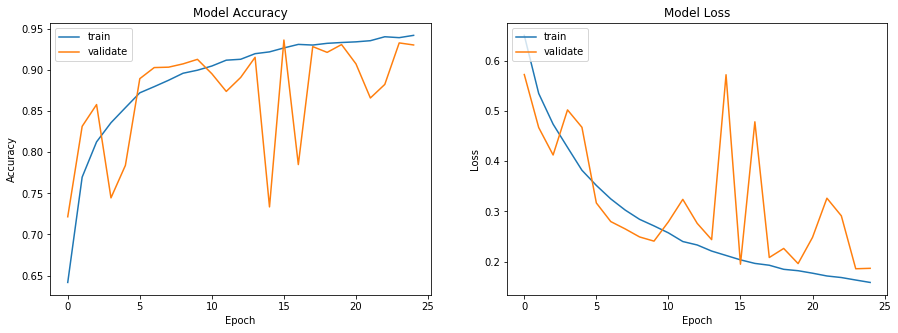

In [37]:
plotmodelhistory(history)

In [38]:
# score model using test set and collect training accuracy for results table

scores_test = model_4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_4.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

282/282 [==============================] - 5s 19ms/step - loss: 0.1427 - accuracy: 0.9433
Test loss: 0.14265768229961395
Test accuracy: 0.9433333277702332
313/313 [==============================] - 6s 18ms/step - loss: 0.1447 - accuracy: 0.9504
Train loss: 0.1446782946586609
Train accuracy: 0.9503999948501587


In [39]:
# add to results df 

results_new = pd.DataFrame({'model': ['model_1x12_e25'],'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results = pd.concat([results, results_new], ignore_index=True)

results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973
1,model_1x12_e5,0.888333,0.350369,0.8722,0.366229
2,model_2x12_e5,0.790667,0.550664,0.8479,0.396608
3,model_1x12_e25,0.943333,0.142658,0.9504,0.144678


Try to increase accuracy by including data augmentation.

In [40]:
# Set up data augmentation object

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode='nearest')

In [41]:
# set up layers for model 5 with 1 conv layer, 12 filters, 25 epochs AND data augmentation

model_5 = Sequential()
model_5.add(Conv2D(12, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_5.add(MaxPooling2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten())
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 12)      336       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 12)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 12)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
_________________________________________________________________
activation_4 (Activation)    (None, 2)                

In [42]:
# keep other global filters and optimizer the same

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set history and train
history = model_5.fit(x=aug.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/25
313/313 [==============================] - 39s 126ms/step - loss: 0.6956 - accuracy: 0.5610 - val_loss: 0.6175 - val_accuracy: 0.6120
Epoch 2/25
313/313 [==============================] - 39s 126ms/step - loss: 0.6073 - accuracy: 0.6742 - val_loss: 0.5409 - val_accuracy: 0.7400
Epoch 3/25
313/313 [==============================] - 39s 125ms/step - loss: 0.5547 - accuracy: 0.7381 - val_loss: 0.4697 - val_accuracy: 0.8240
Epoch 4/25
313/313 [==============================] - 39s 126ms/step - loss: 0.5119 - accuracy: 0.7710 - val_loss: 0.5641 - val_accuracy: 0.6985
Epoch 5/25
313/313 [==============================] - 39s 125ms/step - loss: 0.4702 - accuracy: 0.8035 - val_loss: 0.6721 - val_accuracy: 0.6065
Epoch 6/25
313/313 [==============================] - 39s 126ms/step - loss: 0.4386 - accuracy: 0.8205 - val_loss: 0.4409 - val_accuracy: 0.8225
Epoch 7/25
313/313 [==============================] - 39s 126ms/step - loss: 0.4057 - accuracy: 0.8413 - val_loss: 0.4062 - val_ac

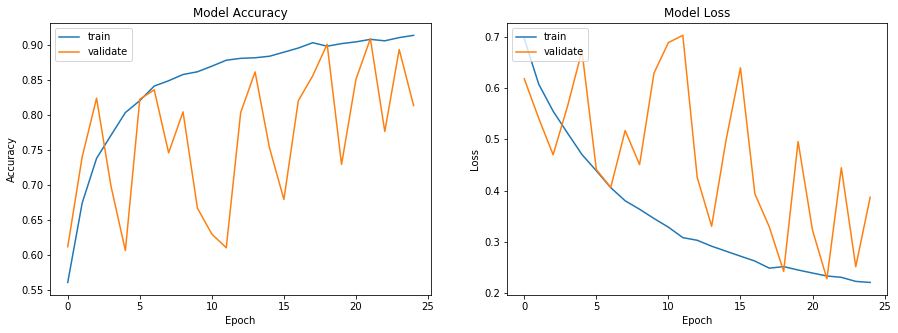

In [43]:
plotmodelhistory(history)

In [44]:
# score model using test set and collect training accuracy for results table

scores_test = model_5.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_5.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

282/282 [==============================] - 5s 19ms/step - loss: 0.3401 - accuracy: 0.8641
Test loss: 0.3400662839412689
Test accuracy: 0.8641111254692078
313/313 [==============================] - 6s 18ms/step - loss: 0.2406 - accuracy: 0.9041
Train loss: 0.24060800671577454
Train accuracy: 0.9041000008583069


In [45]:
# add to results df 

results_new = pd.DataFrame({'model': ['model_1x12_e25_AUG'],'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results = pd.concat([results, results_new], ignore_index=True)

results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973
1,model_1x12_e5,0.888333,0.350369,0.8722,0.366229
2,model_2x12_e5,0.790667,0.550664,0.8479,0.396608
3,model_1x12_e25,0.943333,0.142658,0.9504,0.144678
4,model_1x12_e25_AUG,0.864111,0.340066,0.9041,0.240608


Accuracy decreased, note validation accuracy/loss fluctuates, not generalizing well to validation data. Learning rate may be too high? Try one last model with more filters and additional dropout.

In [46]:
# set up layers for model 6 with 1 conv layer, 32 filters, 25 epochs. Also added additional dropout layer.

model_6 = Sequential()
model_6.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_6.add(MaxPooling2D(pool_size=(2,2)))
model_6.add(Dropout(0.25))

model_6.add(Flatten())
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.25))
model_6.add(Dense(num_classes))
model_6.add(Activation('softmax'))

model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8388672   
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [47]:
# keep other global filters and optimizer the same

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set history and train
history = model_6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/25
313/313 [==============================] - 43s 137ms/step - loss: 0.6560 - accuracy: 0.6374 - val_loss: 0.5643 - val_accuracy: 0.7095
Epoch 2/25
313/313 [==============================] - 42s 135ms/step - loss: 0.4843 - accuracy: 0.8045 - val_loss: 0.6224 - val_accuracy: 0.5740
Epoch 3/25
313/313 [==============================] - 42s 136ms/step - loss: 0.4228 - accuracy: 0.8323 - val_loss: 0.4069 - val_accuracy: 0.8510
Epoch 4/25
313/313 [==============================] - 43s 136ms/step - loss: 0.3778 - accuracy: 0.8558 - val_loss: 0.6070 - val_accuracy: 0.6615
Epoch 5/25
313/313 [==============================] - 42s 135ms/step - loss: 0.3411 - accuracy: 0.8712 - val_loss: 0.4475 - val_accuracy: 0.8025
Epoch 6/25
313/313 [==============================] - 42s 135ms/step - loss: 0.3221 - accuracy: 0.8735 - val_loss: 0.3485 - val_accuracy: 0.8655
Epoch 7/25
313/313 [==============================] - 42s 136ms/step - loss: 0.3029 - accuracy: 0.8823 - val_loss: 0.2520 - val_ac

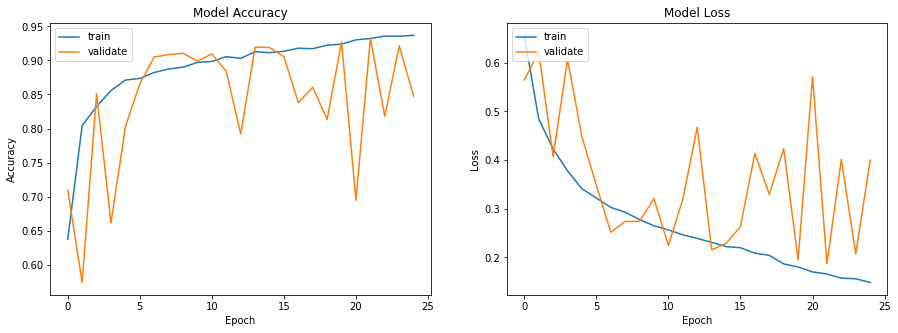

In [48]:
plotmodelhistory(history)

In [49]:
# score model using test set and collect training accuracy for results table

scores_test = model_6.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_test[0])
print('Test accuracy:', scores_test[1])

scores_train = model_6.evaluate(X_train, y_train, verbose=1)
print('Train loss:', scores_train[0])
print('Train accuracy:', scores_train[1])

282/282 [==============================] - 9s 32ms/step - loss: 0.3169 - accuracy: 0.8907
Test loss: 0.3168504536151886
Test accuracy: 0.890666663646698
313/313 [==============================] - 10s 31ms/step - loss: 0.1385 - accuracy: 0.9461
Train loss: 0.13846126198768616
Train accuracy: 0.9460999965667725


In [50]:
# add to results df 

results_new = pd.DataFrame({'model': ['model_1x32_e25'],'test accuracy': [scores_test[1]], 'test loss': [scores_test[0]], 'train accuracy': [scores_train[1]], 'train loss': [scores_train[0]]})
results = pd.concat([results, results_new], ignore_index=True)

results

,model,test accuracy,test loss,train accuracy,train loss
0,model_1x4_e5,0.856333,0.436132,0.7502,0.537973
1,model_1x12_e5,0.888333,0.350369,0.8722,0.366229
2,model_2x12_e5,0.790667,0.550664,0.8479,0.396608
3,model_1x12_e25,0.943333,0.142658,0.9504,0.144678
4,model_1x12_e25_AUG,0.864111,0.340066,0.9041,0.240608
5,model_1x32_e25,0.890667,0.316850,0.9461,0.138461


The simple model with 1 convolutional layer and 12 filters over 25 epochs produced the highest test accuracy.

### Explore best model

Try feeding model one random test image and view results.

In [51]:
# predict on a test set image as example
pred = model_4.predict(X_test[8997].reshape(1,128,128,3))

# print model prediction
print(np.argmax(pred, axis=1))

# check real class
print(y_test[8997,1])

[0]
0.0


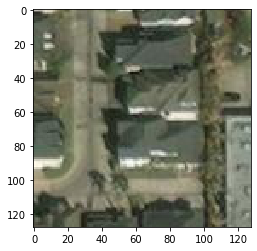

In [52]:
# view the image

img = X_test[8997]
plt.imshow(img)

Evaluate how many test set images the model got wrong.

In [53]:
# count wrong predictions

pred = np.argmax(model_4.predict(X_test), axis=1)
incorrect = X_test[pred != y_test[:, 1]]
incorrect_true_label = y_test[pred != y_test[:, 1]]
incorrect.shape

(510, 128, 128, 3)

In [64]:
incorrect_label_df = pd.DataFrame(incorrect_true_label)
incorrect_label_df.value_counts()

0    1  
0.0  1.0    406
1.0  0.0    104
dtype: int64

Out of 9,000 test images, the model got 510 predictions wrong including 406 damaged images and 104 no-damage images. View a few of the incorrect predictions below.

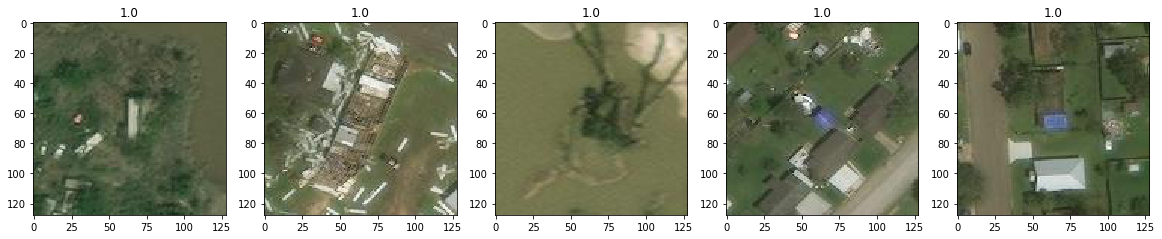

In [55]:
# images labled as damaged that were predicted as not damaged.

plt.figure(figsize=(20, 20))

for i in range(5):
    img = incorrect[i]
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(incorrect_true_label[i, 1])
    plt.imshow(img)

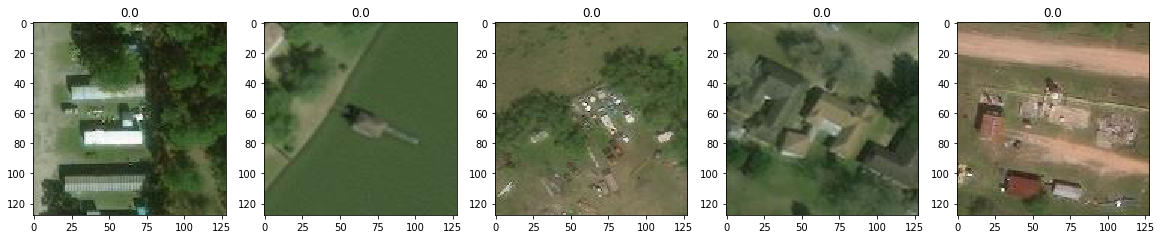

In [68]:
# images labled as not damaged that were predicted as damaged.

plt.figure(figsize=(20, 20))

for i in range(5):
    img = incorrect[i+504]
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(incorrect_true_label[i+504, 1])
    plt.imshow(img)

In [67]:
# save model to file

model_4.save('storage/model_v2/model_v2.hdf5')